In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm, metrics
from skimage import io
import os
import matplotlib.pyplot
from matplotlib.pyplot import imread
import skimage.transform
from skimage.transform import resize as imresize
from sklearn.model_selection import train_test_split
from keras import regularizers
import csv
import time
import cv2

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_DIMENSIONS = (IMAGE_HEIGHT, IMAGE_WIDTH)

TRENING_PUTANJA = './fruits-360/Train'
VALIDACIONA_PUTANJA = './fruits-360/Test'

# kao parametar prima putanju do folder-a dataset-a
def ucitajSlikeIzFoldera(putanja):
    slike = []
    labele = []
    idx_mapa = []
    idx = -1

    subfolderi = os.listdir(putanja)

    for naziv_klase in subfolderi:
        putanja_do_slika = os.path.join(putanja, naziv_klase)
        labele.append(naziv_klase)

        idx = idx + 1
        
        for naziv_slike in os.listdir(putanja_do_slika):
            putanja_do_slike = os.path.join(putanja_do_slika, naziv_slike)
            slika = cv2.imread(putanja_do_slike)
            slika = cv2.resize(slika, IMAGE_DIMENSIONS)
            slika = cv2.cvtColor(slika, cv2.COLOR_RGB2BGR)
            slike.append(slika)
            
            #punim array koji mapira sliku na index labele
            idx_mapa.append(idx)
            
    return np.array(slike), np.array(idx_mapa), labele


start = time.time()
X_train, y_train, labele = ucitajSlikeIzFoldera(TRENING_PUTANJA)
end = time.time()
print("Ucitavanje %d slika je trajalo %d s" % (len(y_train),end-start))

start = time.time()
X_test, y_test, unused = ucitajSlikeIzFoldera(VALIDACIONA_PUTANJA)
end = time.time()
print("Ucitavanje %d slika je trajalo %d s" % (len(y_test),end-start))

X_val, X_test , y_val, y_test = train_test_split(X_test, y_test, test_size = 0.66, random_state = 0)

# ukupno = len(y_train) + len(y_test) + len(y_val)
# print("Velicina trening set-a: %d " % (len(y_train) * 100 / ukupno))
# print("Velicina validacionog set-a: %d " % (len(y_val) * 100 / ukupno))
# print("Velicina test set-a: %d " % (len(y_test) * 100 / ukupno))


Ucitavanje 5744 slika je trajalo 6 s
Ucitavanje 1919 slika je trajalo 2 s


In [23]:
Y_train = np_utils.to_categorical(y_train, 15)
Y_test = np_utils.to_categorical(y_test, 15)
Y_val = np_utils.to_categorical(y_val, 15)


In [24]:
tf.disable_v2_behavior()

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(12))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
history = model.fit(X_train,Y_train, epochs=10, batch_size = 128, validation_data=(X_val,Y_val))


Train on 5744 samples, validate on 652 samples
Epoch 1/10
5744/5744 [==============================] - 43s 7ms/step - loss: 0.6864 - acc: 0.8341 - val_loss: 0.0819 - val_acc: 0.9678
Epoch 2/10
5744/5744 [==============================] - 42s 7ms/step - loss: 0.0243 - acc: 0.9929 - val_loss: 0.0722 - val_acc: 0.9755
Epoch 3/10
5744/5744 [==============================] - 45s 8ms/step - loss: 0.0391 - acc: 0.9864 - val_loss: 0.0938 - val_acc: 0.9678
Epoch 4/10
5744/5744 [==============================] - 46s 8ms/step - loss: 0.0143 - acc: 0.9958 - val_loss: 0.2014 - val_acc: 0.9172
Epoch 5/10
5744/5744 [==============================] - 42s 7ms/step - loss: 0.0050 - acc: 0.9995 - val_loss: 0.0579 - val_acc: 0.9877
Epoch 6/10
5744/5744 [==============================] - 41s 7ms/step - loss: 0.0038 - acc: 0.9993 - val_loss: 0.0209 - val_acc: 0.9893
Epoch 7/10
5744/5744 [==============================] - 39s 7ms/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.1296 - val_acc: 0.9402
Epoch 8/

In [25]:
score = model.evaluate(X_test, Y_test)
print()
print('Test loss: ', score[0])
print('Test Accuracy', score[1])

1267/1267 [==============================] - 3s 2ms/step

Test loss:  0.030450728942802575
Test Accuracy 0.9881610105897652


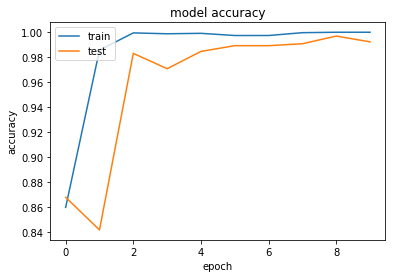

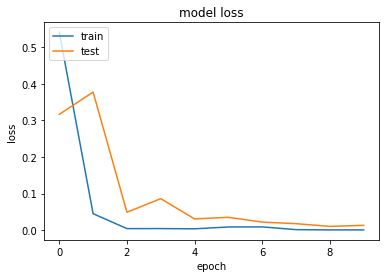

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()